# Data Analysis Pipeline

- Statistical Analysis of the data
- Distribution of the data (Count words : display distribution/ratio of hate speech and not hate speech)
- Tweet length distribution (Display length of tweets and distribution)
- NGRAM (Display most used words / Display bi/tri grams)
- Sentiment/Polarity analysis of the Tweets
- Time Series Analysis
- Stopwords and most used words analysis (Display words appearing in most hate speech text we got ?)
- Wordcloud
- Model Result VS. Annotated Data
- False Negative Analysis - Why our model predicted wrong?
- TODO: Locate hate speech (Region specific)


DISCLAIMER: Note that labels of the dataset must be 0, 1 and 2 other wise it will not work.

Note the the result you get might differ based on the dataset you use :). And some data might not be present in the dataset you are trying to test. Or the labels might not be same as the dataset we used for testing.

---
Data fomat:<br>
1.   tweets      1000 non-null   object<br>
2.   label       1000 non-null   int64 <br>
3.   username    1000 non-null   object<br>
4.   location    730 non-null    object<br>
5.   tweet       1000 non-null   object<br>
6.   raw_tweet   1000 non-null   object<br>

## Imports and preleminaries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import itertools

from matplotlib import style
from google.colab import files
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
from collections import Counter, defaultdict
from wordcloud import WordCloud, STOPWORDS

In [ ]:
# Upload the data to google cloud in case the drag-drop upload is not working.
# This was the case on my side
dataset_file_dict = files.upload()

Saving lgbt_unlabelled.csv to lgbt_unlabelled.csv


In [ ]:
# Read input data from csv as decided.
data = pd.read_csv('/content/prediction.csv')

In [ ]:
if data['tweets']:
    data['tweet'] = data['tweets']
else:
    print('Make sure the dataframe contains a field name [tweet] or change the dataframe names below accordingly...')

## Cleaning Pipeline

NOTE: This is a simple cleaning pipeline, light preprocessin.

- removing special characters
- remove stopwords

In [ ]:
nltk.download('stopwords')
stoplist = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def tweet_processing(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]"," ",raw_tweet)
    words = letters_only.lower().split()
    stops = set(stopwords.words("english"))
    m_w = [w for w in words if not w in stops]
    return (" ".join(m_w))

In [ ]:
data['raw_tweet'] = data['tweet']
data['tweet'] = data['tweet'].apply(tweet_processing)

## Statistical Analysis of the data

In [ ]:
# Provide the dataset information as values and type of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   tweets      1000 non-null   object
 2   label       1000 non-null   int64 
 3   username    1000 non-null   object
 4   location    730 non-null    object
 5   tweet       1000 non-null   object
 6   raw_tweet   1000 non-null   object
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


In [ ]:
 # Provide statistical analysis to the data
 data.describe()

,Unnamed: 0,label
count,1000.000000,1000.000000
mean,499.500000,1.210000
std,288.819436,0.417222
min,0.000000,0.000000
25%,249.750000,1.000000
50%,499.500000,1.000000
75%,749.250000,1.000000
max,999.000000,2.000000


In [ ]:
# How many tweets do we have for each topic
data.groupby('label').describe()

Unnamed: 0                                                             
           count        mean         std    min     25%    50%     75%    max
label                                                                        
0            4.0  598.500000  337.516913  271.0  325.75  610.0  882.75  903.0
1          782.0  493.796675  286.218814    0.0  239.25  498.5  736.75  998.0
2          214.0  518.490654  297.637123    7.0  262.50  501.0  796.25  999.0

In [ ]:
# Is there a null value in the dataset
data.isnull().sum()

Unnamed: 0      0
tweets          0
label           0
username        0
location      270
tweet           0
raw_tweet       0
dtype: int64

## Distribution of the data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


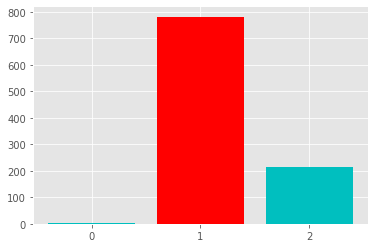

In [ ]:
# Analysing the distribution of tweets per class
style.use('ggplot')
plt.bar(['0', '1', '2'], height=[data['label'].value_counts()[0], data['label'].value_counts()[1], data['label'].value_counts()[2]], color='cr')
plt.show()

In [ ]:
# Check the negative label results
# pd.set_option("display.max_rows", None, "display.max_columns", None)
print(data[data['label'] == 1]['tweet'].head(15))
temp = data[data['label'] == 1]['tweet'].to_csv(r'/content/negative_labeled.csv')

19     thought factory bbc neutrality right wing fasc...
26                  chick gets fucked hottest naked lady
33     suppo taiji fisherman bullying racism tweet ta...
108    many user alum friends waking shocked hear dea...
110    hey user ivanka bracelet feel good profiting x...
133                    user today code white summer love
141           might libtard libtard sjw liberal politics
147    michelleobama looking bit dishevelled thinking...
159    people protesting trump republican trump fuher...
160    work attorneys white officer shot philandocast...
185    looking african news boredem stumbled upon use...
261    could worse embarrassed unfounate traumatized ...
266    user user still fucking bullshit giving bigots...
271    user user user always race religion wrong w am...
278    user video referred sen warren pocahontas stab...
Name: tweet, dtype: object


## Data length

Check for character length for each tweet

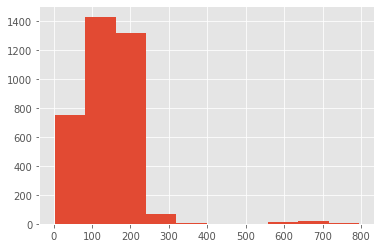

In [ ]:
data['tweet'].str.len().hist()

Check for number of words in a specific tweet (tokenized tweet)

We can see that most tweets are around 10 to 20 words with a small amount for longer tweets.

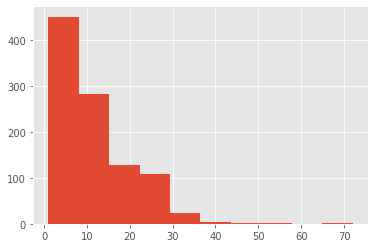

In [ ]:
data['tweet'].str.split().\
    map(lambda x: len(x)).\
    hist()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  # This is added back by InteractiveShellApp.init_path()


Text(0, 0.5, 'character length')

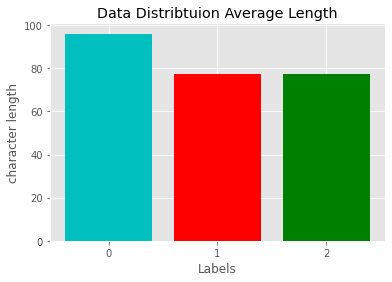

In [ ]:
# Analysing the avarage length of tweets per class
temp_data = data[data['label'] == 0]['tweet']
len_avg0 = sum([len(tweet) for tweet in temp_data]) / len(temp_data)

temp_data = data[data['label'] == 1]['tweet']
len_avg1 = sum([len(tweet) for tweet in temp_data]) / len(temp_data)

temp_data = data[data['label'] == 1]['tweet']
len_avg2 = sum([len(tweet) for tweet in temp_data]) / len(temp_data)

plt.bar(['0', '1', '2'], [len_avg0, len_avg1, len_avg2], color='crg')
plt.title('Data Distribtuion Average Length')
plt.xlabel('Labels')
plt.ylabel('character length')

## Tweet length distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Twitter Data Distribution')

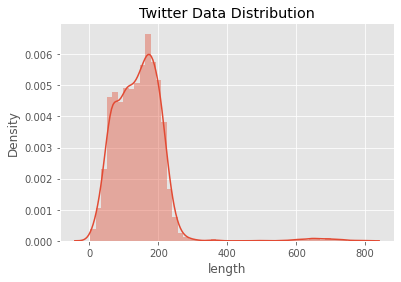

In [ ]:
#Distributio for length of tweets
#Checking length of each tweet
data["length"] = data["tweet"].apply(len)
sns.distplot(data["length"]).set_title('Twitter Data Distribution')

## NGRAM

N-grams analyses are often used to see which words often show up together.

Filter out some stop words, which are the most common words but do not have significant contextual meaning in a sentence

In [ ]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

Analysis of bi / tri grams from whole dataset.

Text(0.5, 1.0, 'Bi-Grams of All Tweets')

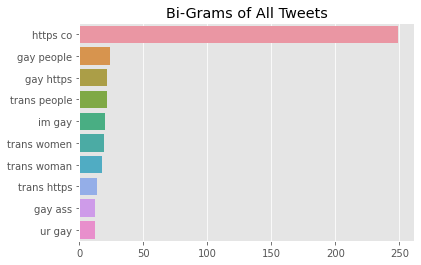

In [ ]:
# Top bigrams for the whole dataset
top_bi_grams=get_top_ngram(data['tweet'],n=2)
x,y=map(list,zip(*top_bi_grams))
sns.barplot(x=y,y=x).set_title('Bi-Grams of All Tweets')

Text(0.5, 1.0, 'Tri-Grams of All Tweets')

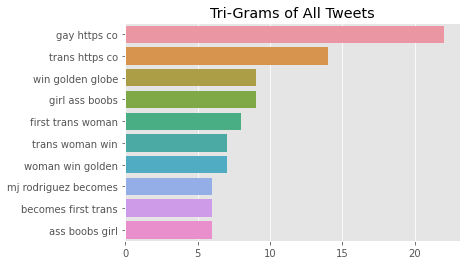

In [ ]:
# Top tri grams for the whole dataset
top_tri_grams=get_top_ngram(data['tweet'],n=3)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x).set_title('Tri-Grams of All Tweets')

Check bi/tri gram for negative labeled tweets

Text(0.5, 1.0, 'Bi-Grams of Hateful Tweets')

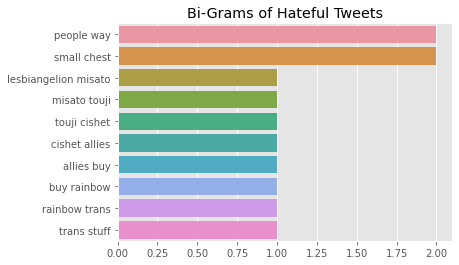

In [ ]:
# Top bigrams for negative labeled tweets
top_bi_grams=get_top_ngram(data[data['label'] == 0]['tweet'],n=2)
x,y=map(list,zip(*top_bi_grams))
sns.barplot(x=y,y=x).set_title('Bi-Grams of Hateful Tweets')

Text(0.5, 1.0, 'Tri-Grams of Hateful Tweets')

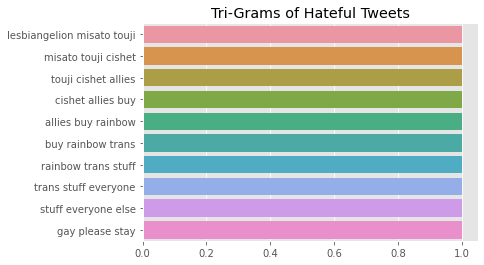

In [ ]:
# Top tri grams for negative labeled tweets
top_tri_grams=get_top_ngram(data[data['label'] == 0]['tweet'],n=3)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x).set_title('Tri-Grams of Hateful Tweets')

## Sentiment/Polarity analysis of the Tweets

We can calculate the polarity and sentiment score for each bigram/trigram and for each tweet.

In [ ]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

def sentiment(x):
    if x<0:
        return 'neg'
    elif x==0:
        return 'neu'
    else:
        return 'pos'

Text(0.5, 1.0, 'Tweets Polarity Score')

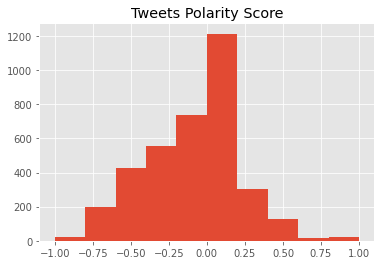

In [ ]:
# Polarity analysis
data['polarity_score']=data['tweet'].apply(lambda x : polarity(x))
data['polarity_score'].hist().set_title('Tweets Polarity Score')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'All Tweets Sentiment Analysis')

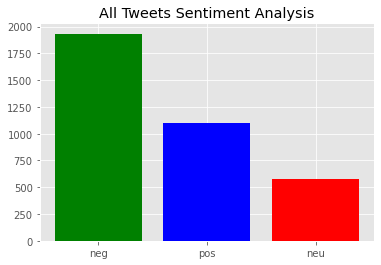

In [ ]:
# Sentiment analysis of the whole dataset
data['polarity']=data['polarity_score'].map(lambda x: sentiment(x))
plt.bar(data.polarity.value_counts().index, data.polarity.value_counts(), color=('gbr'))
plt.title("All Tweets Sentiment Analysis")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Hateful Tweets Sentiment Analysis')

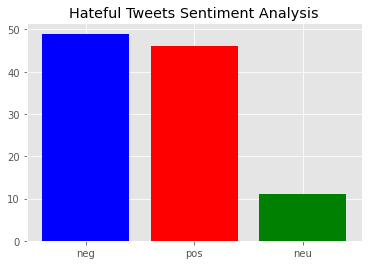

In [ ]:
# Sentiment analysis of negative labeled tweets.
data['polarity']=data[data['label'] == 0]['polarity_score'].map(lambda x: sentiment(x))
plt.bar(data.polarity.value_counts().index, data.polarity.value_counts(), color=('brg'))
plt.title("Hateful Tweets Sentiment Analysis")

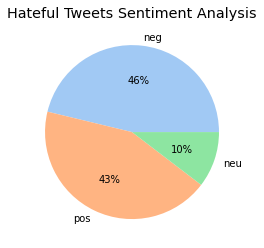

In [ ]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:3]

#create pie chart
plt.pie(data['polarity'].value_counts(), labels = data['polarity'].value_counts().index, colors = colors, autopct='%.0f%%')
plt.title("Hateful Tweets Sentiment Analysis")
plt.show()

## Time Series Analysis

<b>This works only if the data you are analysing contains a date in the dataframe ↪ If you have managed to scrape Twitter API along with a date.</b>

Trend Analysis (how does hate speech ratio change during a month and if there is any event related to the particular increase on the hate speech ratio.)

Number of hate tweets over time

In [ ]:
# flag_nan = data['datum'].isnull().values.any()

/bin/bash: -c: line 0: syntax error near unexpected token `.values.any'
/bin/bash: -c: line 0: `data['datum'].isnull().values.any()'


In [ ]:
# if not flag_nan:
#     sns.set_theme(style="darkgrid")

#     # Plot the responses for different events and regions
#     sns.lineplot(x="datum",
#                 y="tweet",
#                 data=data)

Normal and Hate tweets joint distribution

In [ ]:
# if not flag_nan:
#     with sns.axes_style('white'):
#         sns.jointplot("tweet", "datum", data=data, kind='hex')

## Stopwords and most used words analysis

In [ ]:
nltk.download('stopwords')
stop = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Display most occuring stopwords:

['@ryanjreilly', 'The', 'power', 'of', 'political', 'derangement.', 'The', '“online', 'sleuths”', 'hate', 'Trump', 'supporters', 'so', 'much', 'they’re', 'willing', 'to', 'donate', 'hundreds', 'of', 'hours', 'of', 'their', 'lives', 'to', 'tracking', 'down', 'every', 'unarmed,', 'mostly', 'peaceful', 'protester', 'they', 'can.', 'How’d', 'they', 'get', 'politically', 'deranged?', 'Mainstream', 'media', 'manipulation', 'Via', '@crooksandliars:', 'We', 'Found', 'Ron', 'DeSantis!', "He's", 'Trying', 'To', 'Kill', 'His', 'Wife', 'With', 'COVID!', 'https://t.co/rfNy6zKKTU', '|', '#trump', '#gop', '#republicans', '@rewinn', '@amvetsupport', 'Because', 'they', 'are', 'abusers', 'and', 'trump', '“legitimizes”', 'their', 'hate,', 'misogyny,', 'bigotry,', 'racism…', 'For', '2', 'years', 'Democrats', 'have', 'insisted', 'that', 'all', 'aspects', 'of', 'life', 'must', 'be', 'stopped', 'for', 'Covid', '…', 'except', 'for', 'every', 'woke', 'cause', '➡️BLM', 'protests/riots', 'are', 'more', 'importan

Text(0.5, 1.0, 'Most Used Stopwords')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


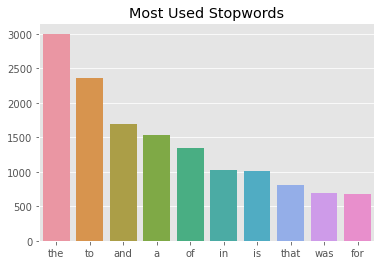

In [ ]:
corpus = []
new = data[data['label'] == 1]['raw_tweet'].str.split()
new = new.values.tolist()
corpus = [word for i in new for word in i]
counter = Counter(corpus)
most = counter.most_common()
dic = defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word] += 1

x, y = [], []
sorted_dic = dict(sorted(dic.items(), key=lambda item: item[1], reverse=True))

for element in dict(itertools.islice(sorted_dic.items(), 10)):
    x.append(element)
    y.append(dic.get(element))

print(corpus)
sns.barplot(x,y).set_title("Most Used Stopwords")

Let’s inspect which words other than these stopwords occur frequently.

In [ ]:
corpus = []
new = data[data['label'] == 1]['tweet'].str.split()
new = new.values.tolist()
corpus = [word for i in new for word in i]
counter = Counter(corpus)
most = counter.most_common()

Text(0.5, 1.0, 'Most used words')

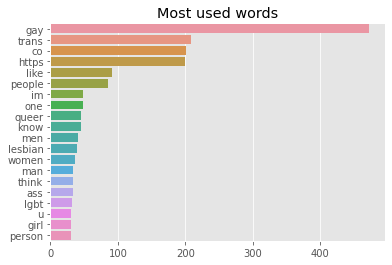

In [ ]:
x, y = [], []
for word,count in most[:20]:
    if (word not in stop):
        x.append(word)
        y.append(count)

sns.barplot(x=y,y=x).set_title("Most used words")

## Most frequent Hashtags

In [ ]:
# Count words without removing special characters and hashtags
corpus = []
new = data[data['label'] == 1]['raw_tweet'].str.split()
new = new.values.tolist()
corpus = [word for i in new for word in i]

Tweets labeled as hate:
____________________________________________________

Number of Used Hashtags :  187
Total Number of Hashtags in hate tweets :  218
Counter:  {'horny': 2, 'ass': 1, 'sext': 1, 'nsfw': 3, 'femboy': 1, 'sissy': 1, 'whore': 1, 'cum': 1, 'cock': 1, 'gay': 5, 'bi': 2, 'slut': 1, 'anal': 2, 'pawg': 1, 'phatass': 1, 'twerk': 1, 'cumshot': 1, 'wankchat': 1, 'kinky': 1, 'nsfwtwt': 1, 'pegging': 1, 'femdom': 1, 'Femboy': 1, 'alpha': 1, 'used': 1, 'BobSaget': 1, 'MetaVisa': 1, 'AuthorUpROAR': 1, 'FreshInkGroup': 1, 'TOMORROW': 1, 'NW': 1, 'EuphoriaHBO': 2, 'nudes': 1, 'dick': 1, 'camshow': 1, 'lgbt': 3, 'bara': 1, 'Yellowjackets': 1, 'ENHYPEN': 5, 'DIMENSION': 5, 'BLESSED': 5, 'clininic34': 1, 'michaelgunner': 2, 'aboriginal': 1, 'women': 1, 'sexworkers': 1, 'vulnerable': 1, 'populations': 1, 'enough': 1, 'MardiGras': 1, 'QueerLiterature': 1, 'LGBTQI': 1, 'Sydney': 1, 'GoldenGlobe': 2, 'GoldenGlobes': 1, 'Youtube': 1, 'youtuber': 1, 'games': 1, 'twitter': 1, 'instagram': 1

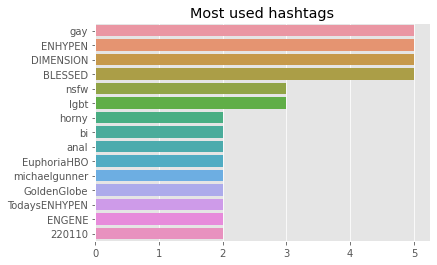

In [ ]:
hash_counts = Counter(re.findall(r'#([a-z0-9]+)', ' '.join(corpus), re.I))
print('Tweets labeled as hate:')
print('____________________________________________________\n')
print('Number of Used Hashtags : ', len(dict(hash_counts)))
print('Total Number of Hashtags in hate tweets : ', sum(hash_counts.values()))
print('Counter: ', dict(hash_counts))

most_common_hashtags = hash_counts.most_common()
print('Sorted: ', most_common_hashtags)

x, y = [], []
for hashtag, count in most_common_hashtags[:15]:
    x.append(hashtag)
    y.append(count)

if len(x) != 0:
    sns.barplot(x=y,y=x).set_title("Most used hashtags")
else :
    print("No hashtags available for the data.")

## Wordcloud

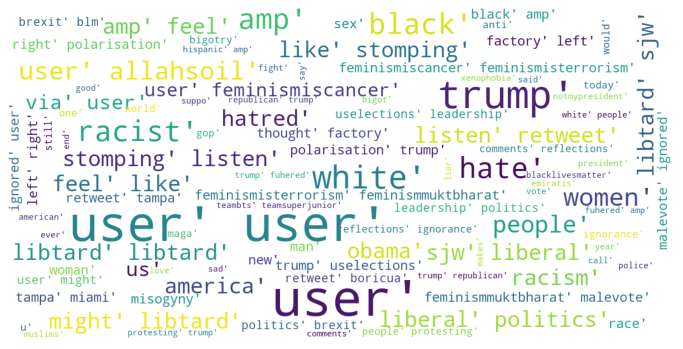

In [ ]:
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus)